### simulate diffraction pattern of AB and ABC stacking
* use dummy cif files (Au instead of C60 on C60 sites) with ABC and AB stacking
* store simulation in pickle file
* for fig S5

Package versions:<br>
python==3.9.15<br>
py4DSTEM==0.13.9<br>
pickleshare==0.7.5<br>

In [1]:
import py4DSTEM
import pickle
from datetime import datetime

In [2]:
file_cif_fcc_ABC = r'..\data\Figure S5\fcc_a14_ABC-stacking.cif'
file_cif_hcp_AB = r'..\data\Figure S5\hcp_a10_c16_AB-stacking.cif'

In [3]:
# load cif files
crystal_fcc_ABC = py4DSTEM.process.diffraction.Crystal.from_CIF(file_cif_fcc_ABC)
crystal_hcp_AB = py4DSTEM.process.diffraction.Crystal.from_CIF(file_cif_hcp_AB)

C:\ProgramData\Miniconda3\envs\py4dstem-aiml-e\lib\site-packages\pymatgen\io\cif.py:1164: UserWarning: Issues encountered while parsing CIF: Some fractional co-ordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))


In [4]:
# Plot the structure
crystal_fcc_ABC.plot_structure(zone_axis_lattice=[1,1,1], figsize=(4,4),)

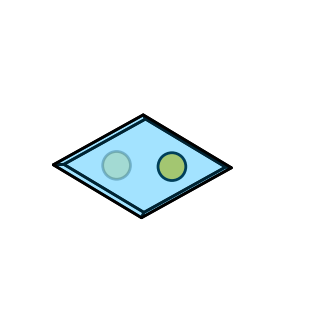

In [5]:
# Plot the structure
crystal_hcp_AB.plot_structure(zone_axis_lattice=[0,0,1], figsize=(4,4),)

In [6]:
k_max = .4   # This is the maximum scattering vector included in the following calculations
crystal_fcc_ABC.calculate_structure_factors(k_max, tol_structure_factor=-1.0)
crystal_hcp_AB.calculate_structure_factors(k_max, tol_structure_factor=-1.0)
crystal_fcc_ABC.setup_diffraction(20000)
crystal_hcp_AB.setup_diffraction(20000)
bragg_peaks_fcc_ABC = crystal_fcc_ABC.generate_diffraction_pattern(
    zone_axis_lattice = [1,1,1], sigma_excitation_error=0.02, tol_excitation_error_mult = 1, tol_intensity = 10**-5)
bragg_peaks_hcp_AB = crystal_hcp_AB.generate_diffraction_pattern(
    zone_axis_lattice = [0.,0.,1], sigma_excitation_error=0.020, tol_excitation_error_mult = 1, tol_intensity = 10**-5)

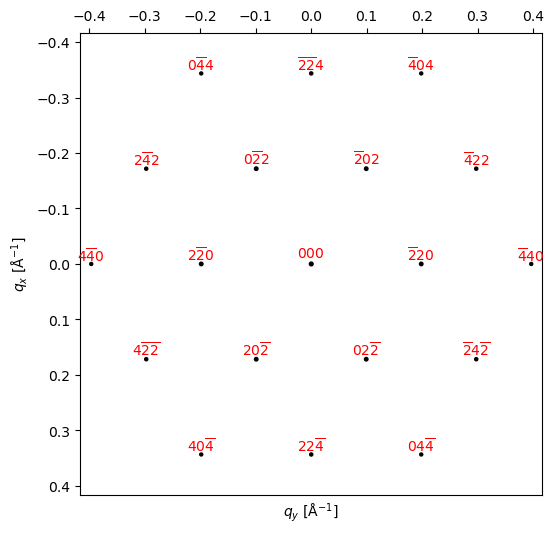

In [7]:
py4DSTEM.process.diffraction.plot_diffraction_pattern(bragg_peaks_fcc_ABC,
    # add_labels=False, figsize=(8,8),
    shift_labels=0.005,
)

In [8]:
py4DSTEM.process.diffraction.plot_diffraction_pattern(bragg_peaks_hcp_AB,
    # add_labels=False, figsize=(8,8),# 
    shift_labels=0.005,
)

In [9]:
# dynamical diffraction pattern
EHT = 20000
crystal_fcc_ABC.calculate_dynamical_structure_factors(EHT, "WK-CP", k_max=1.0, thermal_sigma=0.08, tol_structure_factor=-1.0)
crystal_hcp_AB.calculate_dynamical_structure_factors(EHT, "WK-CP", k_max=1.0, thermal_sigma=0.08, tol_structure_factor=-1.0)

In [10]:
beams_fcc_ABC = crystal_fcc_ABC.generate_diffraction_pattern(zone_axis_lattice=[1,1,1], sigma_excitation_error=0.01, tol_intensity=10**-6, k_max=2,)
beams_hcp_AB = crystal_hcp_AB.generate_diffraction_pattern(zone_axis_lattice=[0,0,1], sigma_excitation_error=0.01, tol_intensity=10**-6, k_max=2,)

In [11]:
beams_fcc_ABC.data.shape

(19,)

In [12]:
beams_hcp_AB.data.shape

(61,)

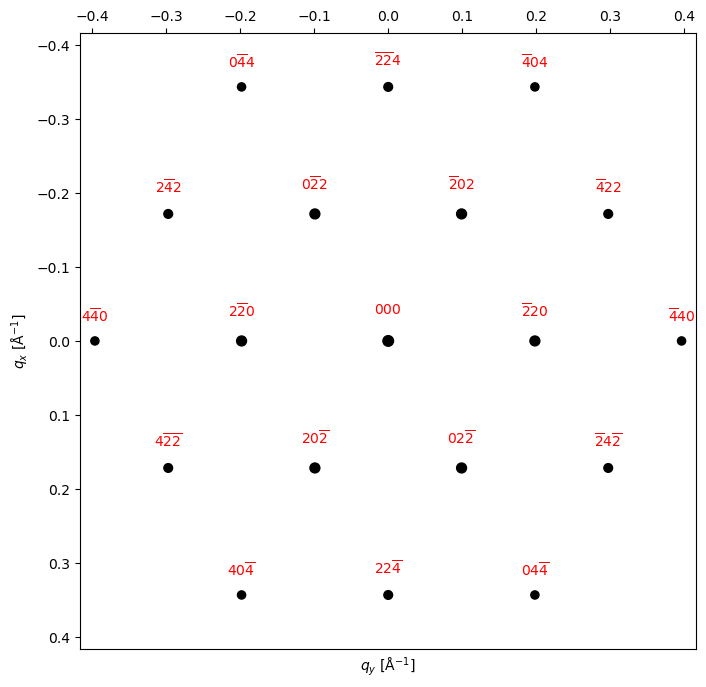

In [13]:
py4DSTEM.process.diffraction.plot_diffraction_pattern(beams_fcc_ABC, scale_markers=4e3, add_labels=True, figsize=(8,8), shift_labels=0.005)

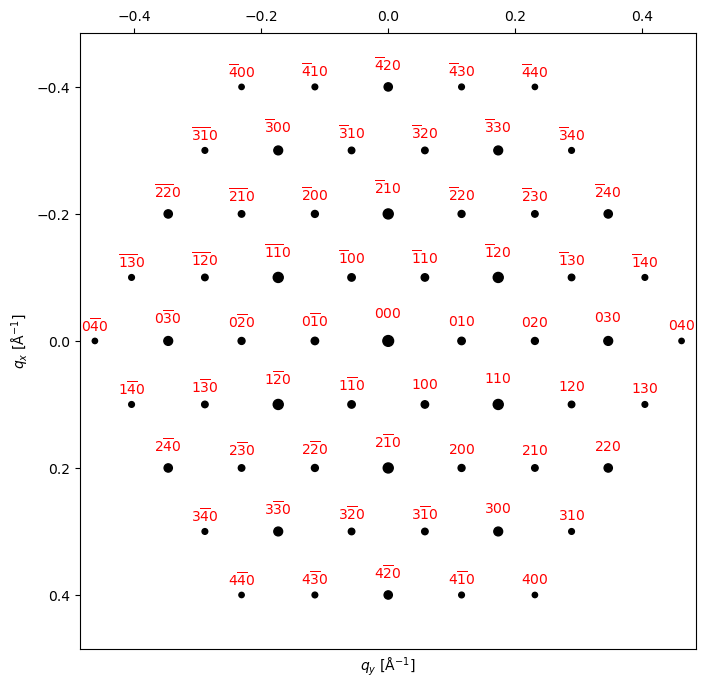

In [14]:
py4DSTEM.process.diffraction.plot_diffraction_pattern(beams_hcp_AB, scale_markers=4e3, add_labels=True, figsize=(8,8), shift_labels=0.005)

In [15]:
thickness = 50.  # Ångström - feel free to tweak this


pattern_fcc_ABC = crystal_fcc_ABC.generate_dynamical_diffraction_pattern(
    beams=beams_fcc_ABC, 
    thickness=thickness, 
    zone_axis_lattice=[1,1,1],
)

pattern_hcp_AB = crystal_hcp_AB.generate_dynamical_diffraction_pattern(
    beams=beams_hcp_AB, 
    thickness=thickness, 
    zone_axis_lattice=[0,0,1]
)



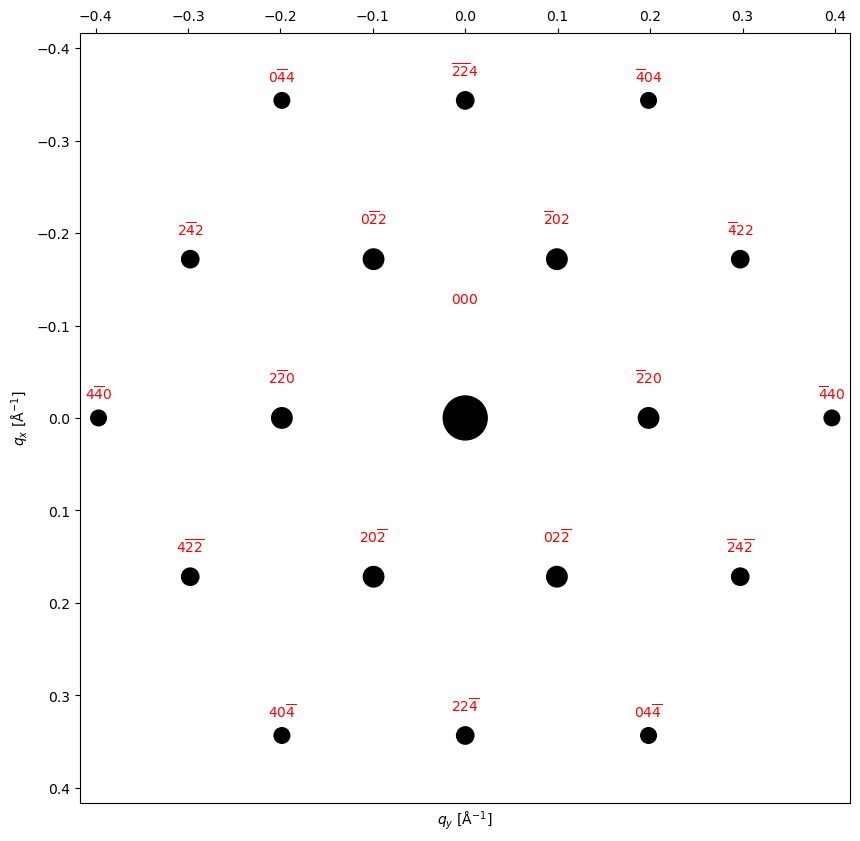

In [16]:
py4DSTEM.process.diffraction.plot_diffraction_pattern(
    pattern_fcc_ABC,
    scale_markers=4e3,
    add_labels=True,
    figsize=(10,10),
    shift_labels=-0.03
)

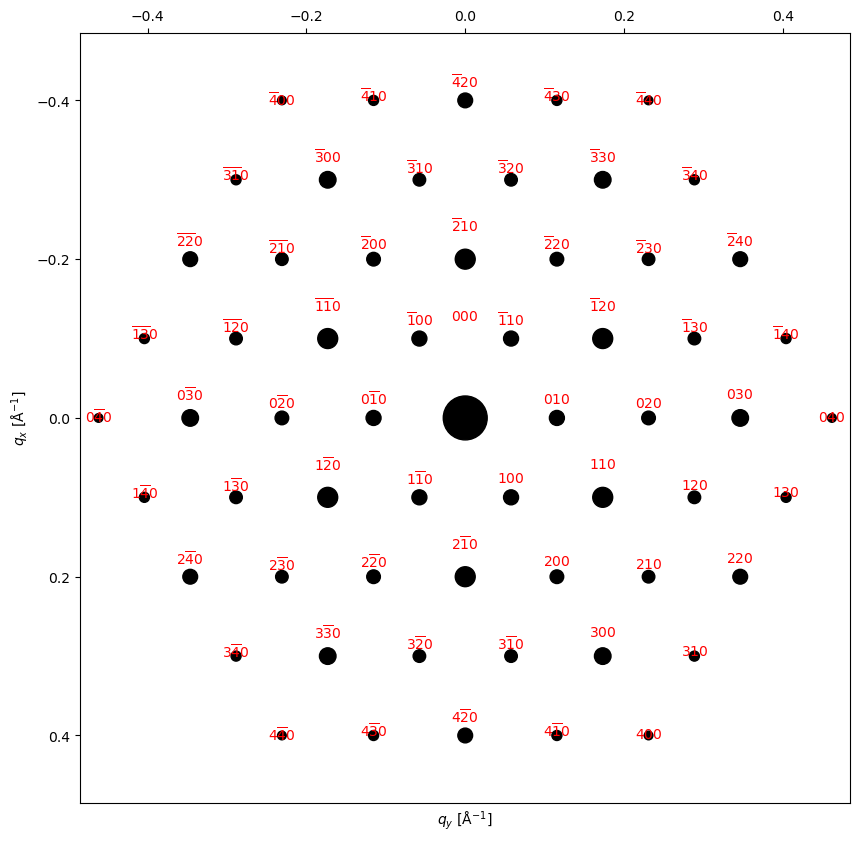

In [17]:
py4DSTEM.process.diffraction.plot_diffraction_pattern(
    pattern_hcp_AB,
    scale_markers=4e3,
    add_labels=True,
    figsize=(10,10),
    shift_labels=-0.03
)

In [18]:
pattern_fcc_ABC_data = pattern_fcc_ABC.data
pattern_hcp_AB_data = pattern_hcp_AB.data

In [19]:
# export simulated diffraction data
#write results and parameter to disk
parameter_file_name = datetime.now().strftime("%Y%m%d_%H%M%S")
data = dict([(i, globals()[i]) for i in ('pattern_fcc_ABC_data','pattern_hcp_AB_data', 'thickness', 'EHT', 'file_cif_fcc_ABC', 'file_cif_hcp_AB', 
                                         )])
with open(r'..\data\Figure S5\\' + parameter_file_name + r'simulation_Au-dummy_fcc-ABC_hcp-AB' +  '.pkl', 'wb') as f:
    pickle.dump(data, f)

In [20]:
pattern_fcc_ABC.data

array([(-0.34354695,  0.19834692, 0.00099421, -4,  0,  4),
       (-0.17177347,  0.29752038, 0.0015048 , -4,  2,  2),
       ( 0.        ,  0.39669385, 0.00099421, -4,  4,  0),
       (-0.34354695,  0.        , 0.0015048 , -2, -2,  4),
       (-0.17177347,  0.09917346, 0.00294062, -2,  0,  2),
       ( 0.        ,  0.19834692, 0.00294062, -2,  2,  0),
       ( 0.17177347,  0.29752038, 0.0015048 , -2,  4, -2),
       (-0.34354695, -0.19834692, 0.00099421,  0, -4,  4),
       (-0.17177347, -0.09917346, 0.00294062,  0, -2,  2),
       ( 0.        ,  0.        , 0.92120933,  0,  0,  0),
       ( 0.17177347,  0.09917346, 0.00294062,  0,  2, -2),
       ( 0.34354695,  0.19834692, 0.00099421,  0,  4, -4),
       (-0.17177347, -0.29752038, 0.0015048 ,  2, -4,  2),
       ( 0.        , -0.19834692, 0.00294062,  2, -2,  0),
       ( 0.17177347, -0.09917346, 0.00294062,  2,  0, -2),
       ( 0.34354695,  0.        , 0.0015048 ,  2,  2, -4),
       ( 0.        , -0.39669385, 0.00099421,  4, -4,  0

In [21]:
pattern_hcp_AB.data

array([(-4.00000000e-01, -2.30940108e-01, 9.45893338e-05, -4,  0, 0),
       (-4.00000000e-01, -1.15470054e-01, 1.68840706e-04, -4,  1, 0),
       (-4.00000000e-01,  8.32667268e-17, 7.96867851e-04, -4,  2, 0),
       (-4.00000000e-01,  1.15470054e-01, 1.68840706e-04, -4,  3, 0),
       (-4.00000000e-01,  2.30940108e-01, 9.45893338e-05, -4,  4, 0),
       (-3.00000000e-01, -2.88675135e-01, 1.68840706e-04, -3, -1, 0),
       (-3.00000000e-01, -1.73205081e-01, 1.26456017e-03, -3,  0, 0),
       (-3.00000000e-01, -5.77350269e-02, 4.15605783e-04, -3,  1, 0),
       (-3.00000000e-01,  5.77350269e-02, 4.15605783e-04, -3,  2, 0),
       (-3.00000000e-01,  1.73205081e-01, 1.26456017e-03, -3,  3, 0),
       (-3.00000000e-01,  2.88675135e-01, 1.68840706e-04, -3,  4, 0),
       (-2.00000000e-01, -3.46410162e-01, 7.96867851e-04, -2, -2, 0),
       (-2.00000000e-01, -2.30940108e-01, 4.15605783e-04, -2, -1, 0),
       (-2.00000000e-01, -1.15470054e-01, 5.80555043e-04, -2,  0, 0),
       (-2.00000000e